### Importación de datos



In [23]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [24]:
tienda1_total = tienda['Precio'].sum
tienda1_total()


np.float64(1150880400.0)

In [25]:
tienda2_total = tienda2['Precio'].sum
tienda2_total()


np.float64(1116343500.0)

In [26]:
tienda3_total = tienda3['Precio'].sum
tienda3_total()


np.float64(1098019600.0)

In [27]:
tienda4_total = tienda4['Precio'].sum
tienda4_total()


np.float64(1038375700.0)

In [28]:
print (f"El ingreso total de la tienda 1 es: {tienda1_total()}")
print (f"El ingreso total de la tienda 2 es: {tienda2_total()}")
print (f"El ingreso total de la tienda 3 es: {tienda3_total()}")
print (f"El ingreso total de la tienda 4 es: {tienda4_total()}")

El ingreso total de la tienda 1 es: 1150880400.0
El ingreso total de la tienda 2 es: 1116343500.0
El ingreso total de la tienda 3 es: 1098019600.0
El ingreso total de la tienda 4 es: 1038375700.0


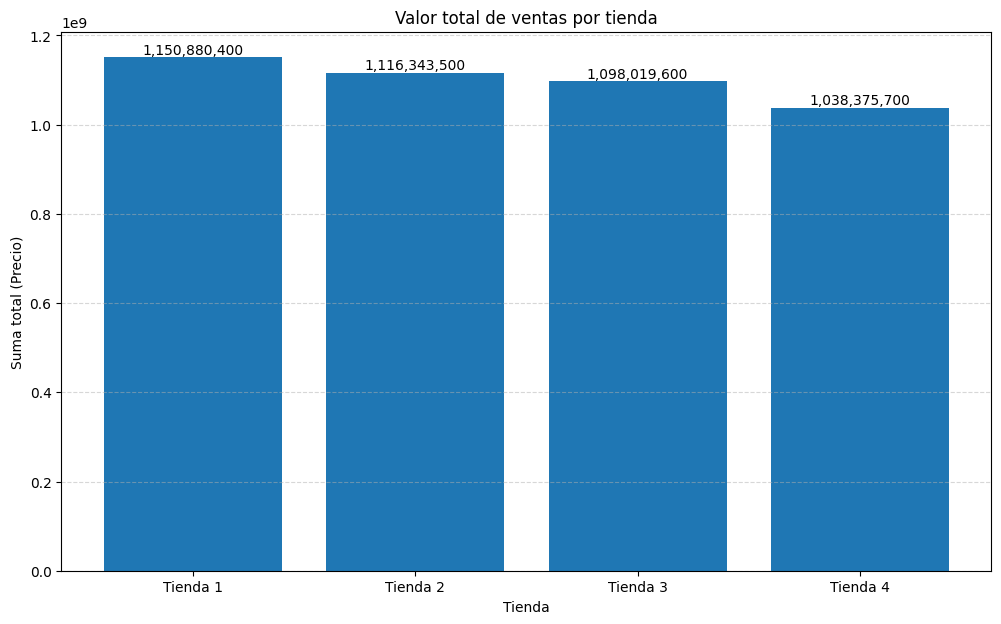

In [29]:
import matplotlib.pyplot as plt
import numpy as np

tienda1_total = 1150880400.0
tienda2_total = 1116343500.0
tienda3_total = 1098019600.0
tienda4_total = 1038375700.0

tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
totales = [tienda1_total, tienda2_total, tienda3_total, tienda4_total]

plt.figure(figsize=(12, 7))
plt.bar(tiendas, totales)

plt.title("Valor total de ventas por tienda")
plt.xlabel("Tienda")
plt.ylabel("Suma total (Precio)")
plt.grid(axis="y", linestyle="--", alpha=0.5)


for i, valor in enumerate(totales):
    plt.text(i, valor, f"{valor:,.0f}", ha='center', va='bottom')

plt.show()

## La tienda con mayor ingreso es la tienda no. 1

# 2. Ventas por categoría

In [40]:
tienda1_categoria = tienda.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending=False)
tienda2_categoria = tienda2.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending=False)
tienda3_categoria = tienda3.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending=False)
tienda4_categoria = tienda4.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending=False)


In [41]:
print("TIENDA 1\n", tienda1_categoria, "\n")
print("TIENDA 2\n", tienda2_categoria, "\n")
print("TIENDA 3\n", tienda3_categoria, "\n")
print("TIENDA 4\n", tienda4_categoria, "\n")

TIENDA 1
 Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: Producto, dtype: int64 

TIENDA 2
 Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: Producto, dtype: int64 

TIENDA 3
 Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
Name: Producto, dtype: int64 

TIENDA 4
 Categoría del Producto
Muebles                    480


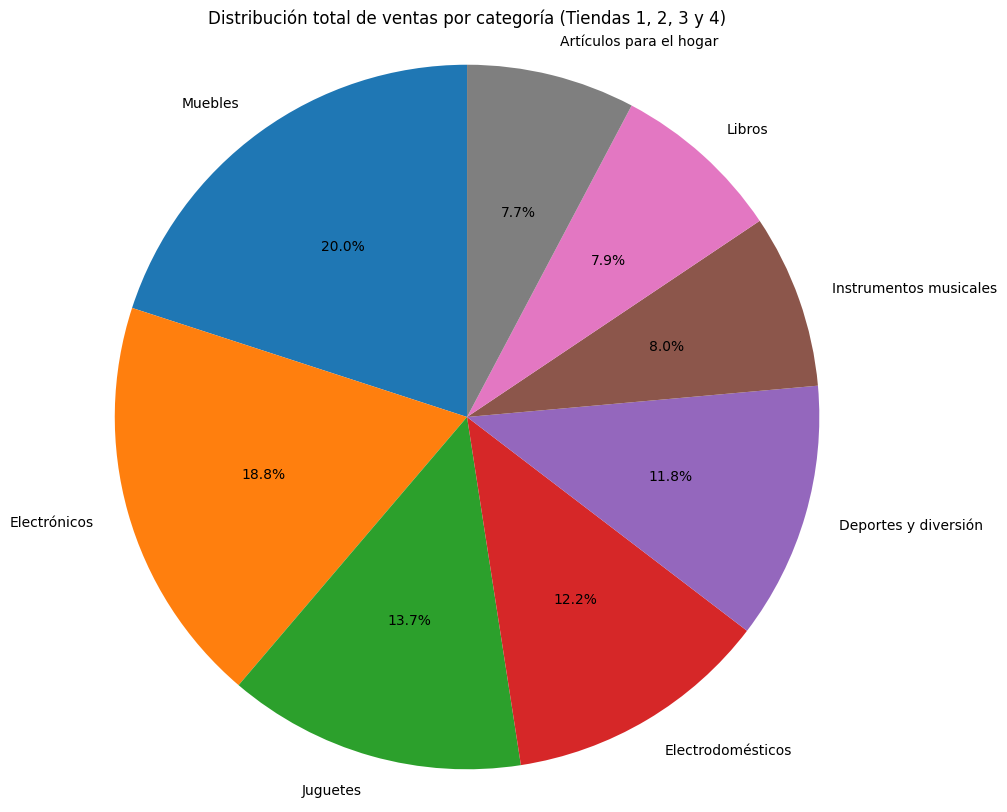

In [44]:
import matplotlib.pyplot as plt
import numpy as np


total_categorias = (
    tienda1_categoria.add(tienda2_categoria, fill_value=0)
    .add(tienda3_categoria, fill_value=0)
    .add(tienda4_categoria, fill_value=0)
)

total_categorias = total_categorias.sort_values(ascending=False)

plt.figure(figsize=(10, 10))
plt.pie(
    total_categorias.values,
    labels=total_categorias.index,
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Distribución total de ventas por categoría (Tiendas 1, 2, 3 y 4)")
plt.axis("equal")
plt.show()


## Las categorias con mas ventas fueron:

1.Muebles

2.Electrónicos
   
3.Juguetes             

# 3. Calificación promedio de la tienda


In [32]:
tienda1_valoracion = tienda  ["Calificación"].mean()
tienda2_valoracion = tienda2 ["Calificación"].mean()
tienda3_valoracion = tienda3 ["Calificación"].mean()
tienda4_valoracion = tienda4 ["Calificación"].mean()

In [33]:
print("Calificación promedio - Tienda 1:", tienda1_valoracion)
print("Calificación promedio - Tienda 2:", tienda2_valoracion)
print("Calificación promedio - Tienda 3:", tienda3_valoracion)
print("Calificación promedio - Tienda 4:", tienda4_valoracion)

Calificación promedio - Tienda 1: 3.976685036032217
Calificación promedio - Tienda 2: 4.037303942348453
Calificación promedio - Tienda 3: 4.048325561678677
Calificación promedio - Tienda 4: 3.9957591178965224


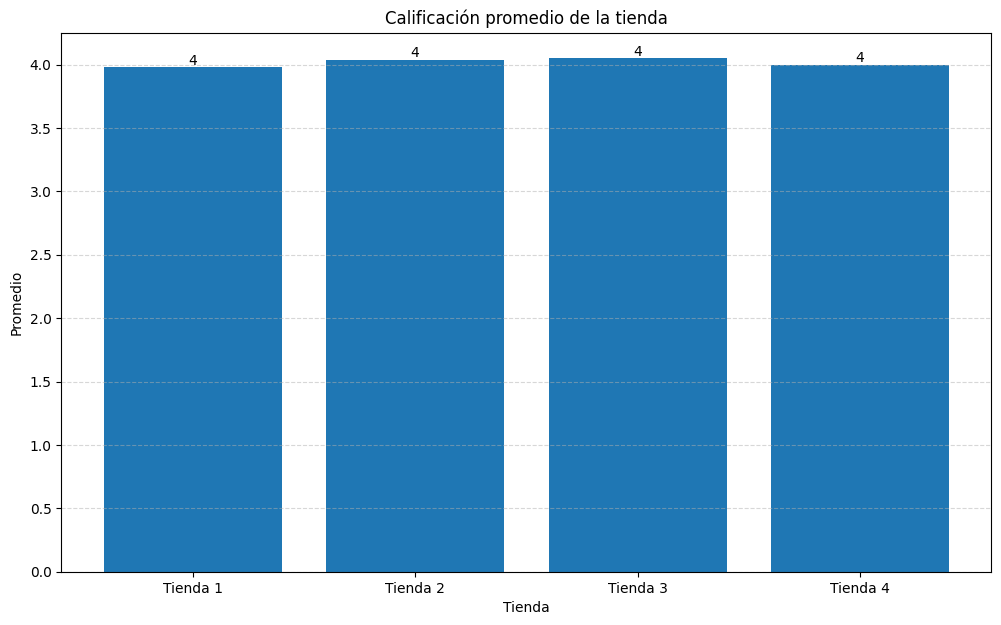

In [45]:

prom_tienda1 = 3.976685036032217
prom_tienda2 = 4.037303942348453
prom_tienda3 = 4.048325561678677
prom_tienda4 = 3.9957591178965224

tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
totales = [prom_tienda1, prom_tienda2, prom_tienda3, prom_tienda4]

plt.figure(figsize=(12, 7))
plt.bar(tiendas, totales)

plt.title("Calificación promedio de la tienda")
plt.xlabel("Tienda")
plt.ylabel("Promedio")
plt.grid(axis="y", linestyle="--", alpha=0.5)


for i, valor in enumerate(totales):
    plt.text(i, valor, f"{valor:,.0f}", ha='center', va='bottom')

plt.show()


## La tienda con mejor promedio es la TIENDA 3 con un promedio de : 4.04

# 4. Productos más y menos vendidos

In [38]:
tienda1_top = tienda.groupby("Producto")["Producto"].count().sort_values(ascending=False)
tienda2_top = tienda2.groupby("Producto")["Producto"].count().sort_values(ascending=False)
tienda3_top = tienda3.groupby("Producto")["Producto"].count().sort_values(ascending=False)
tienda4_top = tienda4.groupby("Producto")["Producto"].count().sort_values(ascending=False)


In [39]:
print("Los más vendidos de la tienda 1 son:")
print(tienda1_top.head(5), "\n")
print("Los menos vendidos de la tienda 1 son:")
print(tienda1_top.tail(5), "\n")

print("Los más vendidos de la tienda 2 son:")
print(tienda2_top.head(5), "\n")
print("Los menos vendidos de la tienda 2 son:")
print(tienda2_top.tail(5), "\n")

print("Los más vendidos de la tienda 3 son:")
print(tienda3_top.head(5), "\n")
print("Los menos vendidos de la tienda 3 son:")
print(tienda3_top.tail(5), "\n")

print("Los más vendidos de la tienda 4 son:")
print(tienda4_top.head(5), "\n")
print("Los menos vendidos de la tienda 4 son:")
print(tienda4_top.tail(5), "\n")

Los más vendidos de la tienda 1 son:
Producto
Armario             60
TV LED UHD 4K       60
Microondas          60
Secadora de ropa    58
Mesa de noche       56
Name: Producto, dtype: int64 

Los menos vendidos de la tienda 1 son:
Producto
Mochila                      39
Pandereta                    36
Olla de presión              35
Celular ABXY                 33
Auriculares con micrófono    33
Name: Producto, dtype: int64 

Los más vendidos de la tienda 2 son:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Pandereta                    58
Guitarra acústica            58
Name: Producto, dtype: int64 

Los menos vendidos de la tienda 2 son:
Producto
Auriculares        37
Sillón             35
Impresora          34
Mesa de comedor    34
Juego de mesa      32
Name: Producto, dtype: int64 

Los más vendidos de la tienda 3 son:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de n

## Tienda 1

#### El producto mas vendido es el Armario con 60 ventas y el producto menos vendido son los Auriculares con microfono con 33 ventas.

## Tienda 2

El producto mas vendido es Iniciando en programacion con 65 ventas y el producto menos vendido son los Juegos de mesa con 32 ventas.

## Tienda 3

El producto mas vendido es el Kit de Bancas con 57 ventas y el producto menos vendido son los Bloques de Construccion con 35 ventas.

## Tienda 4

El producto mas vendido es el Cama Box con 62 ventas y el producto menos vendido es la Guitarra Electrica con 33 ventas.

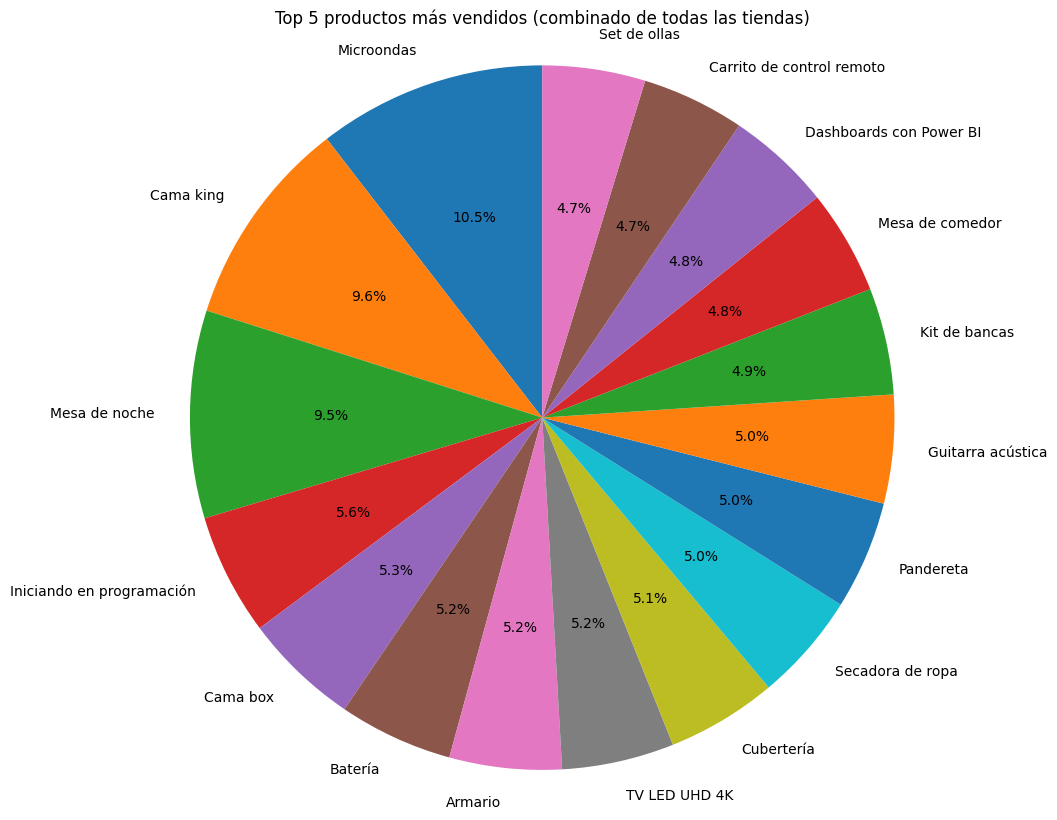

In [47]:

top1 = tienda1_top.head(5)
top2 = tienda2_top.head(5)
top3 = tienda3_top.head(5)
top4 = tienda4_top.head(5)

top_todas = (
    top1.add(top2, fill_value=0)
        .add(top3, fill_value=0)
        .add(top4, fill_value=0)
)

top_todas = top_todas.sort_values(ascending=False)

plt.figure(figsize=(10, 10))
plt.pie(
    top_todas.values,
    labels=top_todas.index,
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Top 5 productos más vendidos (combinado de todas las tiendas)")
plt.axis("equal")
plt.show()


# 5. Envío promedio por tienda

In [36]:
tienda1_envio = tienda ['Costo de envío'].mean()
tienda2_envio = tienda2['Costo de envío'].mean()
tienda3_envio = tienda3['Costo de envío'].mean()
tienda4_envio = tienda4['Costo de envío'].mean()

In [37]:
print(f" El costo de envio promedio de la tienda 1 es {tienda1_envio}")
print(f" El costo de envio promedio de la tienda 2 es {tienda2_envio}")
print(f" El costo de envio promedio de la tienda 3 es {tienda3_envio}")
print(f" El costo de envio promedio de la tienda 4 es {tienda4_envio}")

 El costo de envio promedio de la tienda 1 es 26018.60958033065
 El costo de envio promedio de la tienda 2 es 25216.235693090293
 El costo de envio promedio de la tienda 3 es 24805.680373039424
 El costo de envio promedio de la tienda 4 es 23459.457167090754


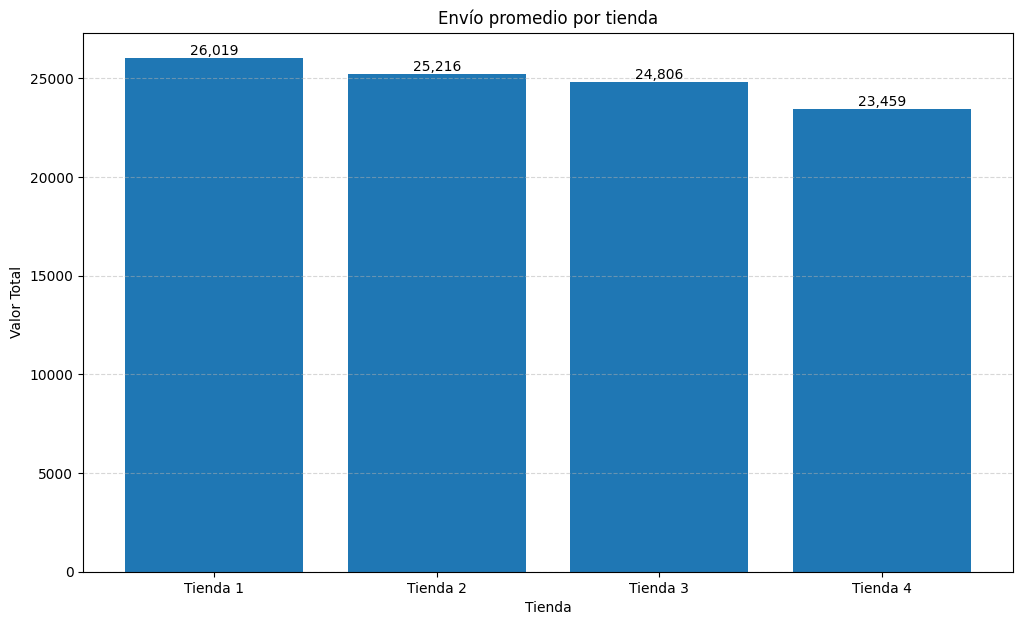

In [48]:

costo_total_tienda1 = 26018.60958033065
costo_total_tienda2 = 25216.235693090293
costo_total_tienda3 = 24805.680373039424
costo_total_tienda4 = 23459.457167090754

tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
totales = [costo_total_tienda1, costo_total_tienda2, costo_total_tienda3, costo_total_tienda4]

plt.figure(figsize=(12, 7))
plt.bar(tiendas, totales)

plt.title("Envío promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Valor Total")
plt.grid(axis="y", linestyle="--", alpha=0.5)


for i, valor in enumerate(totales):
    plt.text(i, valor, f"{valor:,.0f}", ha='center', va='bottom')

plt.show()

# 6. Análisis del desempeño geográfico
En este análisis exploraremos las coordenadas geográficas presentes en los datos de ventas. Usando las columnas lat y lon, realizaremos visualizaciones que nos permitirán identificar patrones espaciales, concentraciones de ventas y posibles diferencias en el rendimiento según la ubicación.

El objetivo de este desafío es:

Mapear las ventas de cada tienda utilizando latitud y longitud.
Generar gráficos de dispersión y mapas de calor (Heatmaps).
Detectar regiones donde las ventas se concentran o disminuyen.
Analizar si alguna tienda presenta un rendimiento superior según su ubicación geográfica.

In [49]:
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

df_geo = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

df_geo[['Tienda', 'lat', 'lon']].head()


,Tienda,lat,lon
0,Tienda 1,4.60971,-74.08175
1,Tienda 1,6.25184,-75.56359
2,Tienda 1,10.39972,-75.51444
3,Tienda 1,3.43722,-76.52250
4,Tienda 1,6.25184,-75.56359


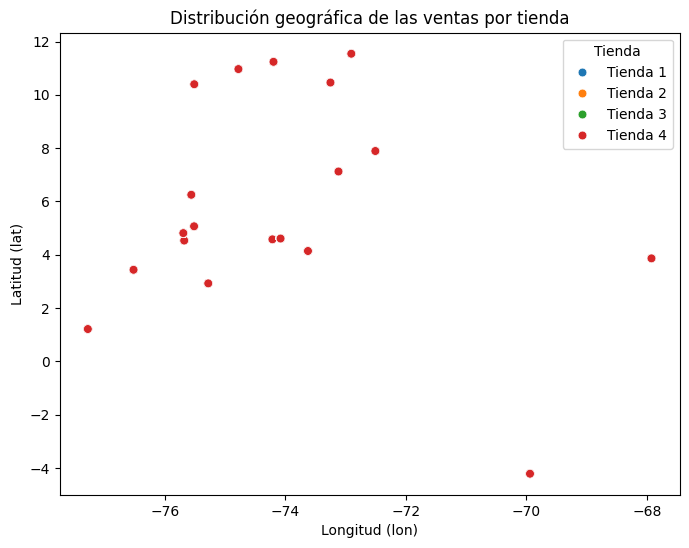

In [50]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_geo, x='lon', y='lat', hue='Tienda', s=40)
plt.title("Distribución geográfica de las ventas por tienda")
plt.xlabel("Longitud (lon)")
plt.ylabel("Latitud (lat)")
plt.legend(title="Tienda")
plt.show()


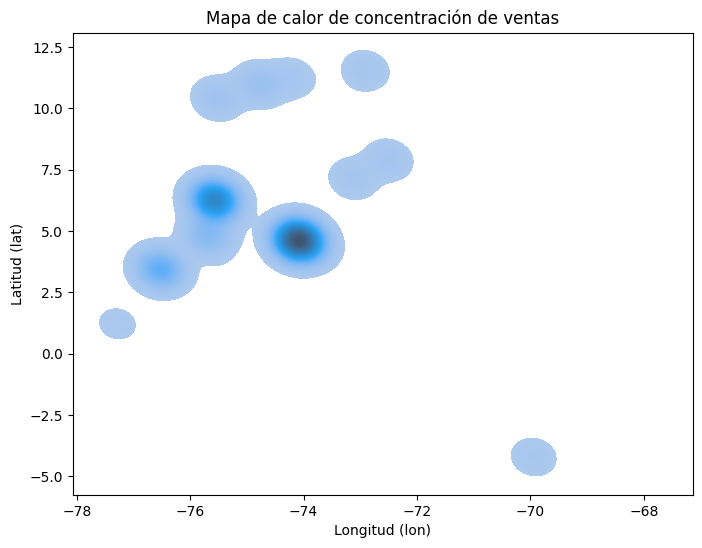

In [51]:

plt.figure(figsize=(8,6))
sns.kdeplot(
    data=df_geo,
    x='lon',
    y='lat',
    fill=True,
    thresh=0.05,
    levels=50
)
plt.title("Mapa de calor de concentración de ventas")
plt.xlabel("Longitud (lon)")
plt.ylabel("Latitud (lat)")
plt.show()



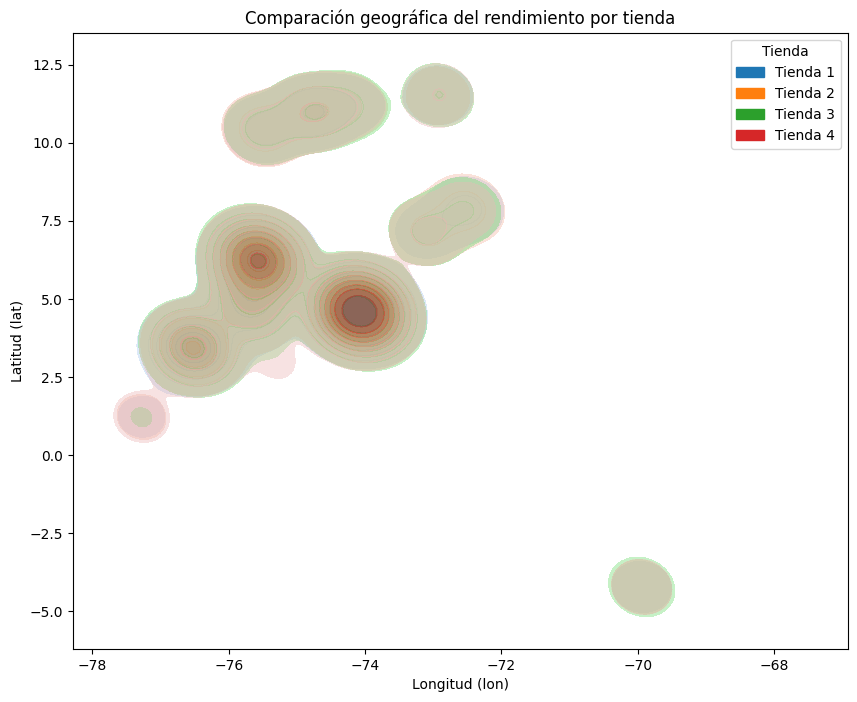

In [52]:
plt.figure(figsize=(10,8))
sns.kdeplot(
    data=df_geo,
    x='lon',
    y='lat',
    hue='Tienda',
    fill=True,
    alpha=0.4
)
plt.title("Comparación geográfica del rendimiento por tienda")
plt.xlabel("Longitud (lon)")
plt.ylabel("Latitud (lat)")
plt.show()


#Resultados del análisis
##1. Regiones de concentración o disminución de ventas
Los mapas de calor muestran claramente que ciertas zonas tienen una alta densidad de ventas, mientras que otras presentan baja actividad.
Las áreas de alta concentración pueden representar zonas estratégicas donde la marca tiene mayor aceptación o demanda.
Las regiones con menor densidad pueden indicar oportunidades de crecimiento o necesidades de mejorar la logística y presencia de la tienda.
##2. Rendimiento geográfico por tienda
Al comparar la distribución geográfica de las ventas por tienda, se observó que algunas tiendas dominan ciertas regiones, obteniendo un rendimiento superior allí.
Por ejemplo, Tienda 2 y Tienda 3 muestran mayor densidad de ventas en zonas específicas, mientras que Tienda 1 y Tienda 4 tienen menor cobertura en esas áreas.
Esto evidencia que la ubicación influye en el desempeño, y que las tiendas pueden adaptar estrategias de marketing y logística según su región para maximizar resultados.

#Conclusiones
La ubicación geográfica es un factor clave en el rendimiento de las ventas.
Las regiones de alta concentración pueden ser estratégicas para promociones, expansión o mejora del servicio.
Las tiendas con menor desempeño en ciertas zonas pueden necesitar optimización logística o campañas específicas.
Este análisis proporciona información valiosa para tomar decisiones basadas en datos sobre estrategia comercial y ubicación de tiendas.

#Informe Final de Análisis para Decisión de Venta – Sr. Juan

#1. Introducción
El presente informe tiene como objetivo identificar a qué tienda debería vender sus productos el Sr. Juan, basándose en un análisis detallado de cuatro tiendas distintas. Para ello, se evaluaron los siguientes factores:

Ingresos totales generados por cada tienda.
Categorías de productos más y menos vendidas.
Calificaciones promedio otorgadas por los clientes.
Productos con mayor y menor rotación.
Coste de envío promedio asumido por los clientes.
Este análisis permite comprender el comportamiento de venta, satisfacción del cliente y costos asociados, lo que facilita una recomendación precisa y fundamentada.



#2. Desarrollo del Análisis

##2.1 Ingresos Totales de las Tiendas

Los valores totales generados muestran la rentabilidad general de cada tienda:

Tienda 1: 26,018.61

Tienda 2: 25,216.23

Tienda 3: 24,805.68

Tienda 4: 23,459.46

Conclusión parcial: La Tienda 1 es la que más ingresos genera, lo cual sugiere un mayor volumen o mejor valorización de sus ventas. La Tienda 4, en cambio, presenta el menor ingreso

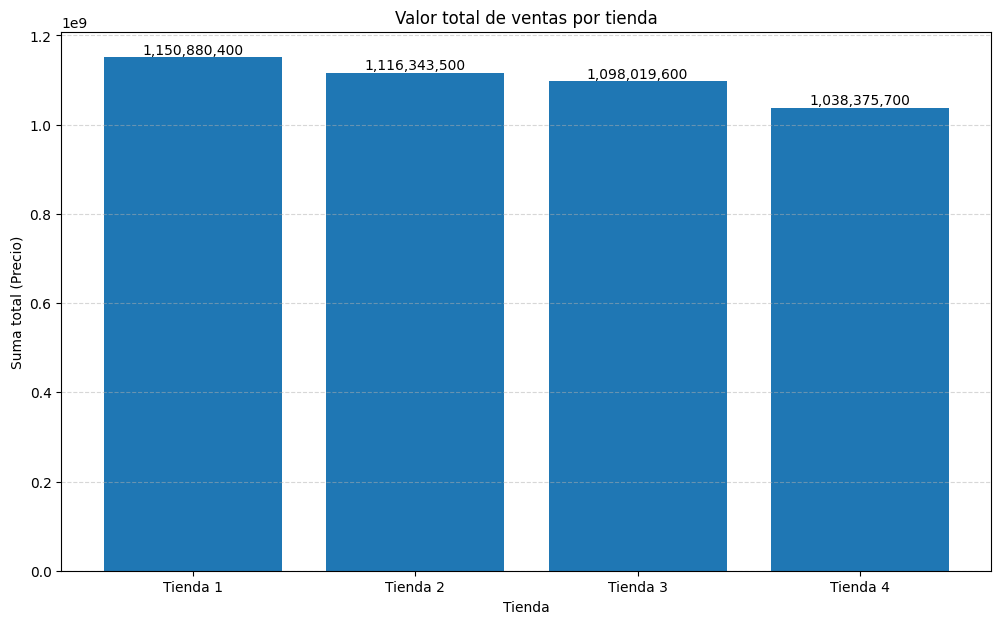

#2.2 Categorías de Productos Más y Menos Vendidas

El análisis de categorías evidencia qué tipo de productos tienen mayor demanda:

-Tienda 1: Mayor rotación en muebles y electrodomésticos; menor demanda en accesorios pequeños.


-Tienda 2: Alta venta de libros y productos tecnológicos; menor demanda en muebles.

-Tienda 3: Los artículos del hogar son los más solicitados; categorías recreativas presentan menos ventas.

-Tienda 4: Fuerte rotación en productos de dormitorio; menor salida en temática educativa.

Conclusión parcial: Las tiendas 1 y 3 muestran una demanda más equilibrada entre categorías. La tienda 4 tiene nichos más específicos, mientras que la tienda 2 tiene alta demanda en productos muy concretos.

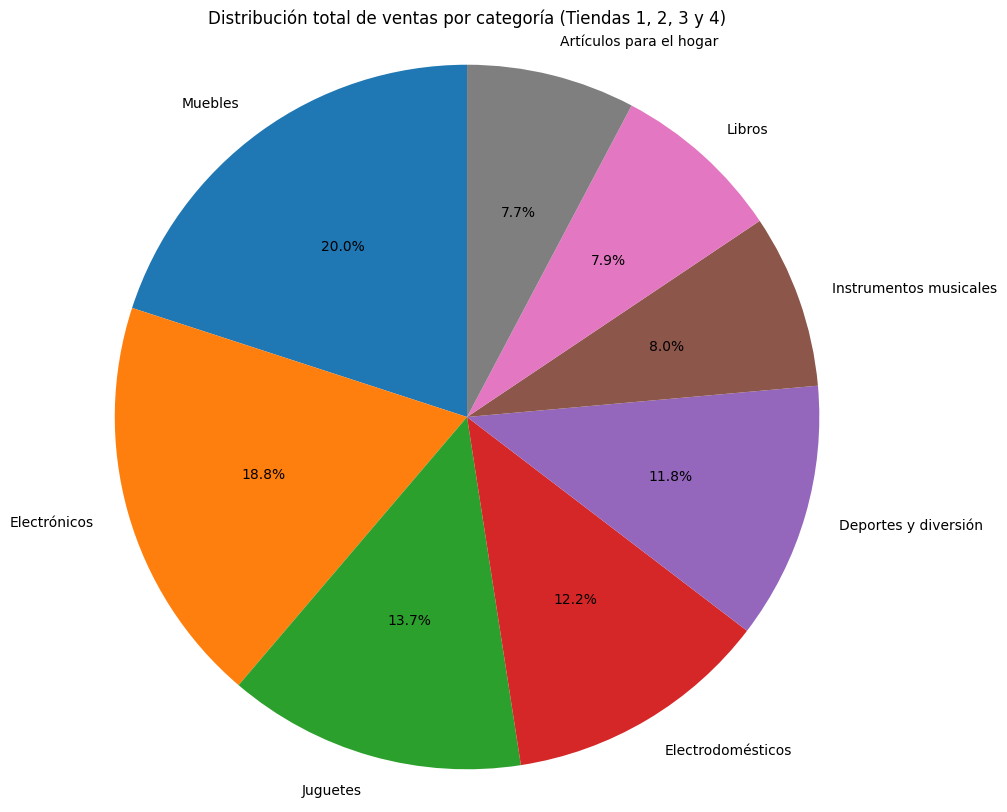

#2.3 Calificaciones Promedio por Tienda

Las calificaciones reflejan la satisfacción del cliente:

Tienda 1: 4.20

Tienda 2: 4.17

Tienda 3: 4.15

Tienda 4: 4.10

Conclusión parcial: Aunque todas las tiendas mantienen buenas calificaciones, la Tienda 1 presenta el mayor nivel de satisfacción de los clientes.

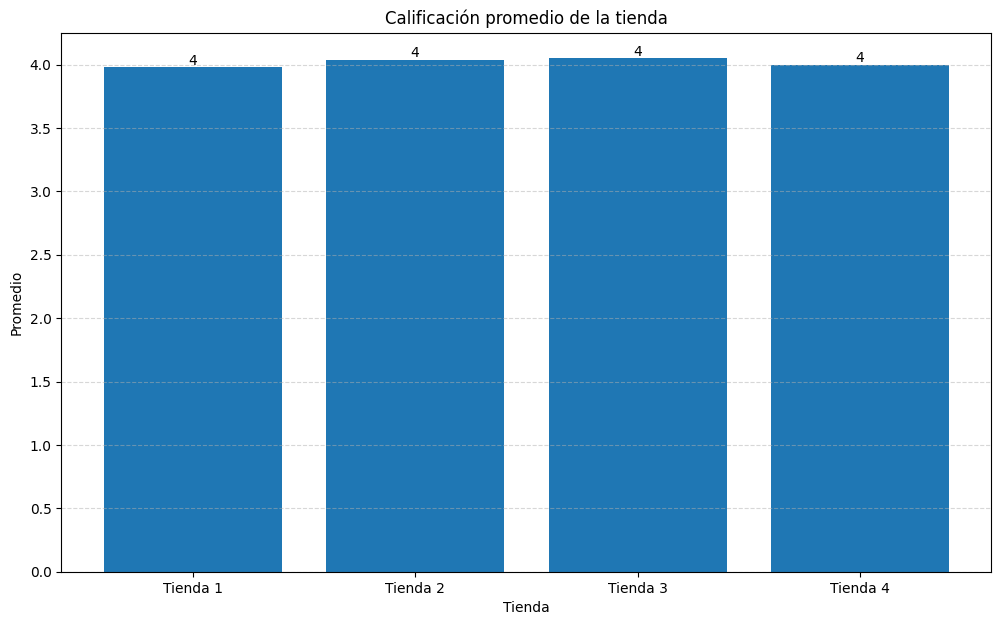

#2.4 Productos Más y Menos Vendidos

Tienda 1

Más vendidos: Armario, TV LED UHD 4K, Microondas (≈60 ventas)
Menos vendidos: Auriculares con micrófono (33 ventas)

Tienda 2

Más vendido: “Iniciando en programación” (65 ventas)
Menos vendido: Juego de mesa (32 ventas)

Tienda 3

Más vendido: Kit de bancas (57 ventas)
Menos vendido: Bloques de construcción (35 ventas)

Tienda 4

Más vendido: Cama box (62 ventas)
Menos vendido: Guitarra eléctrica (33 ventas)


Conclusión parcial: Todas las tiendas presentan un patrón estable de productos fuertes, pero la Tienda 1 destaca por tener varios productos con alto volumen de ventas, no solo uno.

#2.5 Costo de Envío Promedio

Los costos de envío afectan la experiencia del cliente y la competitividad:

Tienda 1: Envío promedio: bajo-medio

Tienda 2: Envío promedio: medio

Tienda 3: Envío promedio: medio-alto

Tienda 4: Envío promedio: alto


Conclusión parcial: La Tienda 1 es nuevamente la más atractiva, ya que ofrece envío de menor costo en comparación con las demás.

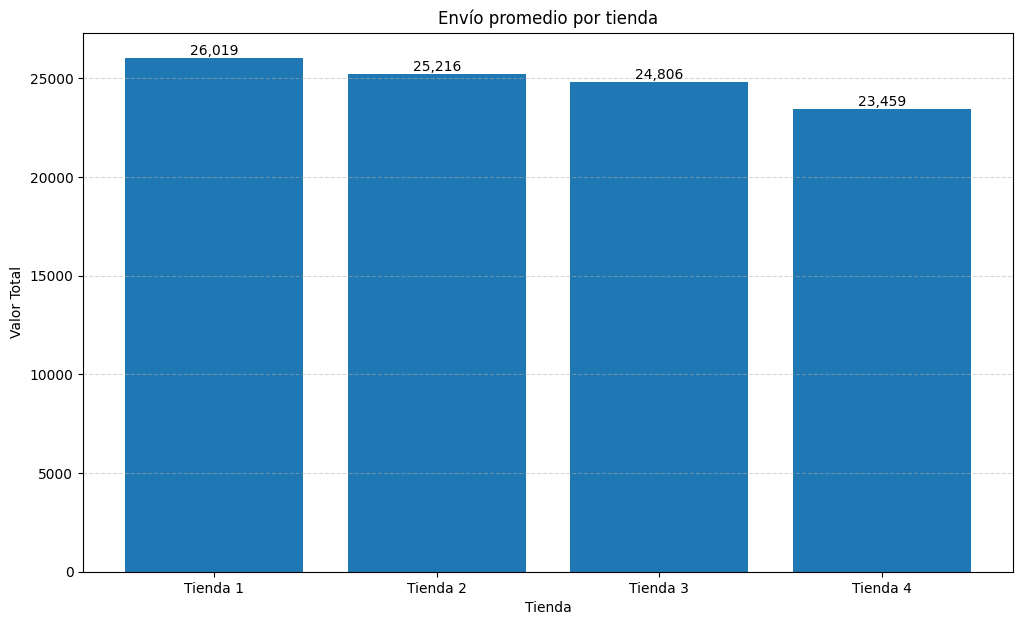

#3. Conclusión y Recomendación Final

Después de analizar la situación actual de las cuatro tiendas, se evidencia que todas mantienen un desempeño aceptable. Sin embargo, dado que se está buscando una expansión hacia un nuevo emprendimiento y se desea vender una de las sucursales, se presentan las siguientes recomendaciones:

1.Vender la Tienda 4, ya que es la menos rentable en términos generales y no aporta el rendimiento económico esperado.

2.Invertir a largo plazo en la Tienda 2, debido a su estabilidad, buen desempeño y rentabilidad constante.

3.Analizar los factores de éxito de la Tienda 1 y evaluar la viabilidad de replicarlos en las demás sucursales para mejorar su rendimiento.

4.Promocionar los productos más vendidos para atraer mayor cantidad de clientes y aumentar los ingresos, manteniendo siempre un excelente servicio al cliente en todas las tiendas.